In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [4]:
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD")
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,33011200300,5.545963,38.300592,0.270128,27.384239,0.330187,63.347055,0.198597,0.093944,0.158122,1.059623,0.032130
1,40143006804,9.945518,45.962841,0.354856,36.506218,0.477251,523.532741,0.350389,0.031774,0.906029,2.057131,0.014083
2,6037670201,11.025699,39.963957,0.524406,29.451154,0.417762,927.605586,0.255783,0.114456,1.235506,6.043254,0.007902
3,37075920300,7.151892,41.135693,0.079001,22.554992,0.291927,0.000000,0.179945,0.014706,0.071323,0.060957,0.000000
4,12127082704,7.108762,33.055004,0.207651,25.259680,0.342766,124.130906,0.020862,0.024677,0.204295,0.173533,0.000069


In [5]:
# Re-indexing
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [6]:
print(X_test.shape, y_test.shape, y_train.shape)

(18081, 11) (18081, 2) (54242, 2)


In [7]:
y_test.head()

,CensusTract,COPD_prevalence
0,48363000200,9.2
1,13097080511,4.3
2,6065042621,4.3
3,55079019400,6.6
4,48449950800,7.1


In [8]:
y_test.set_index("CensusTract", inplace=True)
y_train.set_index("CensusTract", inplace=True)

In [9]:
y_test = np.array(y_test)
y_test = y_test.reshape(18081,)
y_train = np.array(y_train)
y_train = y_train.reshape(54242,)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(54242, 11) (18081, 11) (18081,) (54242,)


In [10]:
X_test.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
48363000200,7.835928,43.690489,0.116622,29.420670,0.375640,7.630057,0.309554,0.013459,0.219415,0.024292,0.000319
13097080511,9.558367,41.287037,0.273422,39.787646,0.550262,9.443178,0.022558,0.015613,0.266822,0.172345,0.000795
6065042621,11.046213,71.897991,0.453856,35.848117,0.498800,757.987176,0.022249,0.177818,0.255750,3.460333,0.000000
55079019400,7.804416,43.419265,0.580469,25.422555,0.334292,1941.438744,0.264927,0.082746,0.153335,1.019652,0.013213
48449950800,9.201295,41.012906,0.252302,37.564744,0.475359,226.479450,0.203932,0.013612,2.572529,0.073132,0.000642


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random Forest Regressor with default values.

In [22]:

rf = RandomForestRegressor(max_depth=36, n_estimators=600) 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=36, n_estimators=600)

In [23]:
y_pred = rf.predict(X_test)

In [24]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.6037989187178643
MAE: 1.2073539620801228
MSE: 2.773781541327011
RMSE: 1.6654673642335387


In [19]:
# Instantiating RandomForestRegressor with default values
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred = rf.predict(X_test)

In [21]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5994157553759538
MAE: 1.2132700071898679
MSE: 2.804467821967812
RMSE: 1.6746545380966822


### This R<sup>2</sup> score is mediocre. Tuning hyperparameters next.

In [30]:
# Instantiating RandomForestRegressor with randomized searching for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {"n_estimators":range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [31]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [32]:
rs.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=497)

In [34]:
y_pred = rs.predict(X_test)

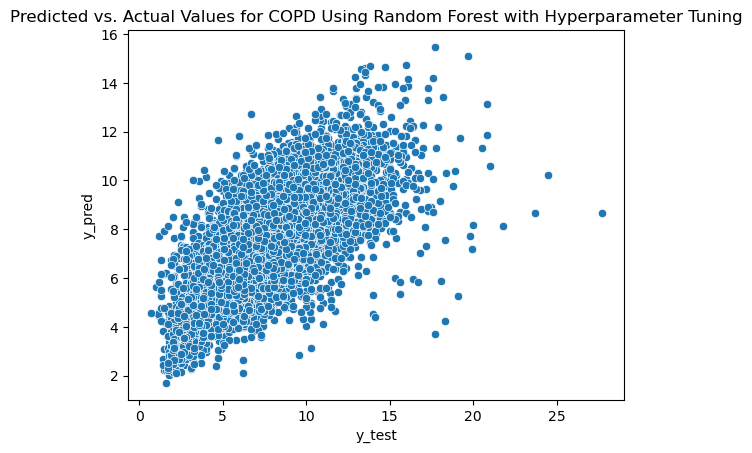

In [35]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [36]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.6036496686665296
MAE: 1.2071967502259355
MSE: 2.774826432562781
RMSE: 1.6657810277953045


In [42]:
import pickle

pickle.dump(rf, open('/Users/butler/Documents/hp/Capstone_Two/models/COPD_best_model_rf.pkl', 'wb'))

### The R<sup>2</sup> score barely changed. Now tuning hyperparameters via Bayesian search

In [37]:
opt = BayesSearchCV(RandomForestRegressor(), {"n_estimators":Integer(2,500), "max_depth":Integer(1,30)})
_ = opt.fit(X_train, y_train)

In [38]:
opt.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=459)

In [39]:
y_pred = opt.predict(X_test)

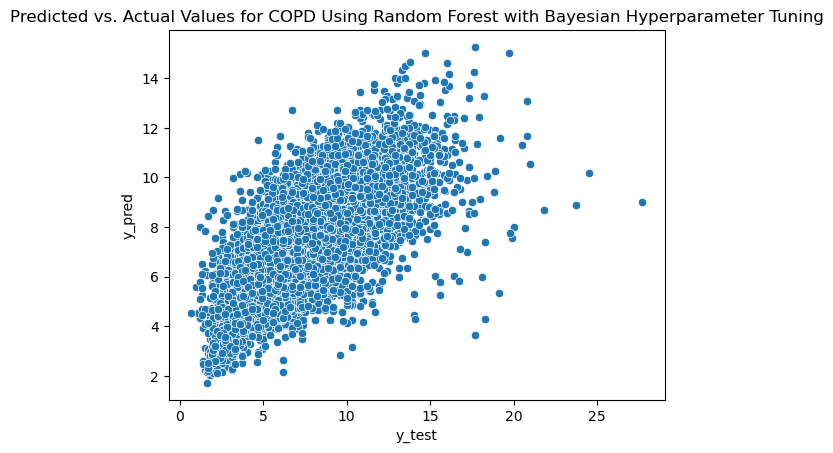

In [40]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [41]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.6035032920878834
MAE: 1.20678027546512
MSE: 2.775851206777473
RMSE: 1.6660885951165603


In [44]:

rf = RandomForestRegressor(max_depth=29, n_estimators=497) 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=29, n_estimators=497)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.602025130812873
MAE: 1.2093679549664864
MSE: 2.7861997309320765
RMSE: 1.6691913404196885


In [47]:
import pickle

pickle.dump(rf, open('/Users/butler/Documents/hp/Capstone_Two/models/COPD_model_rf_randomized.pkl', 'wb'))

### This is slightly better than random forest using the randomized search hyperparameters

### Since the hyperparameters given by the Bayesian search are at or close to the maximum range given, it may be helpful to start with different ranges.

In [ ]:
opt = BayesSearchCV(RandomForestRegressor(), {"n_estimators":Integer(500,700), "max_depth":Integer(25,45)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The obj

In [ ]:
opt.best_estimator_

RandomForestRegressor(max_depth=36, n_estimators=600)

In [ ]:
y_pred = opt.predict(X_test)

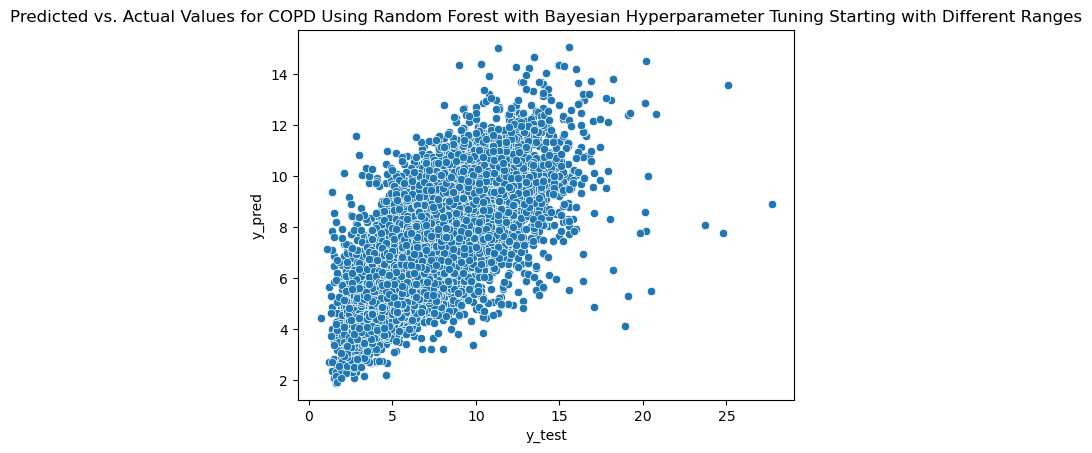

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Bayesian Hyperparameter Tuning Starting with Different Ranges")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [ ]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5683420534211803
MAE: 1.2620712194856953
MSE: 2.9799411317017297
RMSE: 1.726250599334213


### This model is slightly better than the random forest one using hyperparameters optimized by the first Bayesian search.

### AdaBoost Regressor

In [23]:
# Instantiating AdaBoostRegressor with default parameters
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [24]:
y_pred = ada.predict(X_test)

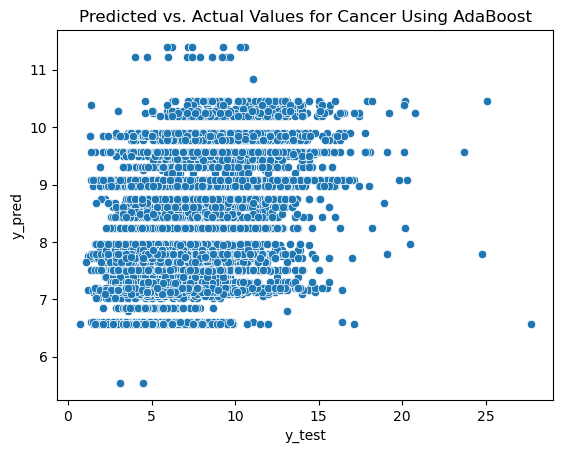

In [25]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [26]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.09016747967314265
MAE: 2.294220594988374
MSE: 7.525947197009182
RMSE: 2.7433459856549596


### With a negative R<sup>2</sup> value, this is a horrible model.

### Now with tuned hyperparameters via randomized search.

In [27]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [28]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [29]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=10.000999999999998, n_estimators=398)

In [30]:
y_pred = rs.predict(X_test)

In [31]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -29.751863446013132
MAE: 14.299894591397535
MSE: 212.29481232894761
RMSE: 14.57034015831297


### Changing the parameters made the results worse. 

### Gradient Boost Regressor

In [32]:
# Instantiating GradientBoostRegressor with default parameters
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [33]:
y_pred = gb.predict(X_test)

In [34]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.39011964743370897
MAE: 1.5564373268809988
MSE: 4.210295588053512
RMSE: 2.0519004820052826


### This is not as good as random forest

### Now with tuned hyperparameters via randomized search.

In [35]:
# Instantiating GradientBoost and using randomized searching for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [36]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [37]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=49,
                          n_estimators=406)

In [38]:
y_pred = rs.predict(X_test)

In [39]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3417220274132181
MAE: 1.6150242803307446
MSE: 4.544407492441208
RMSE: 2.1317615937156784


### Using the tuned hyperparameters gave a worse R<sup>2</sup> value.

### XGBoost Regressor

In [40]:
# Instantiating XGBoost with default parameters
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)

In [42]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5142599861116262
MAE: 1.355337692840616
MSE: 3.353295492812221
RMSE: 1.8312005605100226


### This model is still not as good as Random Forest.

### Now with tuned hyperparameters via randomized search.

In [43]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [44]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [45]:
rs.best_params_

{'min_child_weight': 136, 'max_depth': 20, 'gamma': 37}

In [46]:
y_pred = rs.predict(X_test)

In [47]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5183552873030648
MAE: 1.3472932362370533
MSE: 3.325023671190963
RMSE: 1.8234647436106253


### This is slightly better than XGBoost without the tuned  hyperparameters, but it is still not as good as Random Forest. 

### Now tuning hyperparameters via Bayesian search

In [48]:
opt = BayesSearchCV(XGBRegressor(), {"max_depth":Integer(1,200), "min_child_weight":Integer(1,200), "gamma":Integer(1,200)})
_ = opt.fit(X_train, y_train)

In [49]:
opt.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=55, max_leaves=None,
             min_child_weight=114, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
y_pred = opt.predict(X_test)

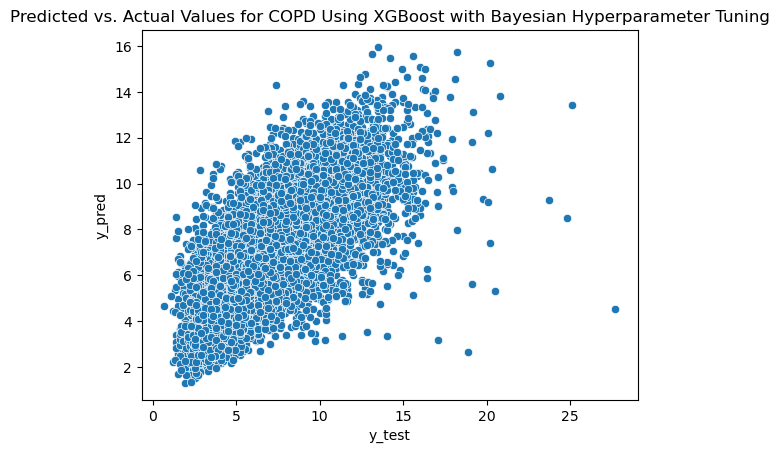

In [51]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using XGBoost with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [52]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5427976827240983
MAE: 1.3083258027662765
MSE: 3.1562861324760205
RMSE: 1.7765939695034487


### This is about the same as using the hyperparameters tuned via randomized search. 

### LightGBM Regressor

In [53]:
# Instantiating LGBMRegressor and randomly searching for best hyperparameters reg_alpha and reg_lambda
lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [54]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [55]:
y_pred = rs.predict(X_test)

In [56]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.49180023059655986
MAE: 1.3912264436130484
MSE: 3.508345920582094
RMSE: 1.8730579063611712


In [57]:
rs.best_estimator_

LGBMRegressor(reg_alpha=34.00099999999999, reg_lambda=1.001)

### Now tuning hyperparameters via Bayesian search

In [58]:
# Instantiating Bayesian search using LightGBM 
opt = BayesSearchCV(ltb.LGBMRegressor(), {"reg_alpha": Real(1e-3,100), "reg_lambda": Real(1e-3,100)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The obj

In [59]:
y_pred = opt.predict(X_test)

In [60]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5007157467468194
MAE: 1.3800729482629466
MSE: 3.4467978511046837
RMSE: 1.8565553724854758


In [61]:
opt.best_estimator_

LGBMRegressor(reg_alpha=6.000583314768741, reg_lambda=0.001)

### Not as good as the previous model. 

In [ ]:
# Checking data


### Support vector machine requires normalized data.

In [10]:
# Importing normalized data
X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_COPD")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_COPD")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,33011200300,5.545963,38.300592,-0.533141,-0.346152,-0.675382,-0.697778,-0.300257,0.274639,-0.833384,-0.048558
1,40143006804,9.945518,45.962841,-0.148846,0.616116,0.379177,0.383743,0.337122,-0.754167,0.772466,0.472439
2,6037670201,11.025699,39.963957,0.448604,-0.106693,-0.021892,0.737115,-0.039700,0.518319,1.073345,1.226421
3,37075920300,7.151892,41.135693,-1.724596,-0.971063,-0.987758,-2.100288,-0.391428,-1.139037,-1.217419,-1.275748
4,12127082704,7.108762,33.055004,-0.865524,-0.608672,-0.576440,-0.388511,-1.323839,-0.907671,-0.657551,-1.054574


In [11]:
X_train_log.shape, X_test_log.shape

((54242, 11), (18081, 11))

### Support Vector Machine Regressor with tuned parameters via randomized search

In [12]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.
svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [13]:
svm_rs.fit(X_train_log, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [14]:
svm_rs.best_estimator_

SVR(C=5.01, epsilon=2.0001)

In [15]:
y_pred = svm_rs.predict(X_test_log)

In [16]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.029494720201035607
MAE: 2.0311243221988464
MSE: 6.794453013998251
RMSE: 2.6066171590776905


In [17]:
X_test_log_dropped = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_dropped_COPD")
X_train_log_dropped = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_dropped_COPD")

In [18]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.
svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [19]:
svm_rs.fit(X_train_log_dropped, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [20]:
svm_rs.best_estimator_

SVR(C=7.01, epsilon=1.0001)

In [21]:
y_pred = svm_rs.predict(X_test_log_dropped)

In [22]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.02759763960123307
MAE: 2.002857746831995
MSE: 6.807734368842396
RMSE: 2.6091635381559346


### The R<sup>2</sup> score indicates that SVM regression is not a good model for this data.

## Random forest with the second Bayesian hyperparameter tuning gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.